# Taking Decision Tree to predict the target & evaluating performace against each feature<br>
1 - Build one decision tree per feature<br>
2 - Predict the target using the feature<br>
3 - Measure its performance roc-auc<br>
4 - Rank the features based on metric - roc-auc

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

# Classification Tree

In [11]:
# Loading dataset
data = pd.read_csv('..\data\dataset_2.csv')

In [14]:
data.shape

(50000, 109)

In [16]:
data.head(2)

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,...,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,5.751633,2.808895,1.244055,11.269688,15.866550,...,0.466241,7.273476,0.623398,2.070677,1.108609,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,8.225109,2.001220,8.081647,3.933986,14.350374,...,0.958500,6.475936,1.230876,2.249656,0.615216,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433


In [17]:
# For all feature selections, its always good to examine features using only training data. This will avoid overfit.

In [22]:
X_train,X_test,y_train,y_test = train_test_split(
        data.drop(labels = ['target'], axis = 1),
        data['target'],
        test_size = 0.3,
        random_state = 0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

# Determining roc-auc for each feature

In [24]:
X_train.head(2)

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,...,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
17967,6.266666,1.520409,17.922689,3.866667,2.585592,0.799603,1.900000,3.203983e-01,14.445884,0.554391,9.104477,2.102856,1.992650,12.736036,15.753493,...,0.620008,5.736979,0.800001,1.536921,0.952382,1.943790,7.617142,2.817604,17.383773,17.069624,7.714285,1.053142,1.686956e+00,1.312909,2.395443
32391,6.533332,7.284080,18.014173,3.121622,1.808227,1.732501,2.032433,-7.984653e-07,9.510484,0.010140,5.425001,2.909910,1.828894,8.593242,14.384168,...,3.756595,7.373931,1.106756,3.099711,1.889764,3.455311,6.050450,2.944502,16.546584,15.134684,5.451802,2.229729,1.090888e-07,5.125165,2.017953


In [28]:
X_train['var_1'].to_frame().head()

,var_1
17967,6.266666
32391,6.533332
9341,5.072728
7929,4.376470
46544,5.896078


In [34]:
y_train.shape

(35000,)

In [36]:
# to store roc0auc values
roc_values = []
 # Iterating over the each featurein the dataset
for feature in X_train.columns:
    
    # Training decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
    
    # Obtaining predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())
    #print(y_scored)
    # Calculating ^ Storing roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:,1]))
    
# looking the the values
roc_values[0:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

Text(0, 0.5, 'roc-auc')

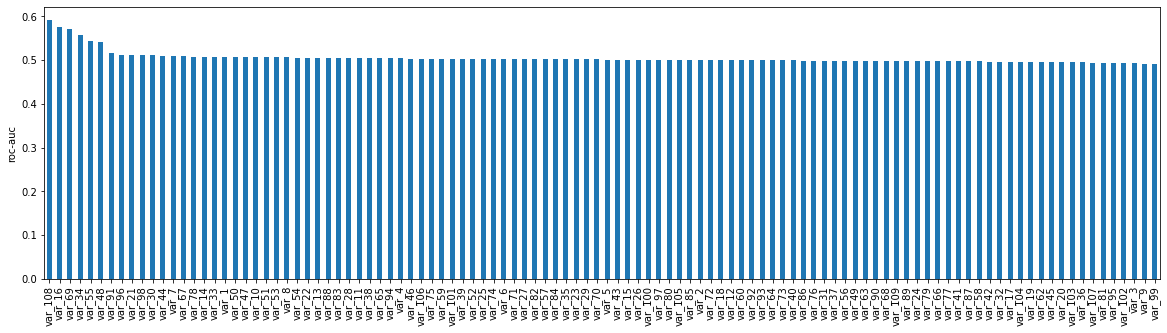

In [43]:
# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
#roc_values
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [44]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

67

67 of 108 features show a predictive performance higher than 0.5.

We can of do fine tuning the parameters of the Decision Tree for better predictions and metrics



In [45]:
# Selecting only those feature for which we have roc_auc values greater than 0.5
selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [46]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((35000, 67), (15000, 67))